In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(601)

import sklearn
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

# 2. 데이터 전처리
## Data Cleansing & Pre-Processing

In [2]:
data = pd.read_csv('data/201901-202003.csv')

In [3]:
data.head()
data.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6
24697791,202003,충북,충주시,휴양콘도 운영업,충북,충주시,60s,1,5,3,194000,3


In [4]:
data = data.fillna('')

In [5]:
# CARD_SIDO_NM HOM_SIDO_NM 비교해서 같은지 다른지로만 판단 

idx_0 = data[(data.CARD_SIDO_NM == data.HOM_SIDO_NM) == True].index
data.loc[idx_0, 'HOM_SIDO_NM'] = 0
idx_1 = data[(data.CARD_SIDO_NM == data.HOM_SIDO_NM) == False].index
data.loc[idx_1, 'HOM_SIDO_NM'] = 1
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,1,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,1,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,1,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,1,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,1,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,1,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,1,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,1,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,1,충주시,50s,2,4,4,99000,6


In [6]:
data.drop(['CARD_CCG_NM','HOM_CCG_NM','CSTMR_CNT'], inplace=True, axis=1)
data

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,CNT
0,201901,강원,건강보조식품 소매업,1,20s,1,1,311200,4
1,201901,강원,건강보조식품 소매업,1,30s,1,2,1374500,8
2,201901,강원,건강보조식품 소매업,1,30s,2,2,818700,6
3,201901,강원,건강보조식품 소매업,1,40s,1,3,1717000,5
4,201901,강원,건강보조식품 소매업,1,40s,1,4,1047300,3
...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,1,30s,1,2,43300,4
24697788,202003,충북,휴양콘도 운영업,1,40s,1,3,35000,3
24697789,202003,충북,휴양콘도 운영업,1,50s,1,4,188000,6
24697790,202003,충북,휴양콘도 운영업,1,50s,2,4,99000,6


In [7]:
merge = pd.read_csv('data/submission.csv', index_col=0)
merge.drop(['AMT'], axis=1, inplace=True)

index = merge[merge['REG_YYMM'] == 202007].index
merge.drop(index, axis=0, inplace=True)

merge.shape
merge

(697, 3)

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM
id,,,
0,202004,강원,건강보조식품 소매업
1,202004,강원,골프장 운영업
2,202004,강원,과실 및 채소 소매업
3,202004,강원,관광 민예품 및 선물용품 소매업
4,202004,강원,그외 기타 분류안된 오락관련 서비스업
...,...,...,...
692,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업
693,202004,충북,한식 음식점업
694,202004,충북,호텔업


In [8]:
sub_col = []
for REG_YYMM in data['REG_YYMM'].unique():
    for CARD_SIDO_NM in merge['CARD_SIDO_NM'].unique():
        for STD_CLSS_CD in merge['STD_CLSS_NM'].unique():
            sub_col.append([REG_YYMM, CARD_SIDO_NM, STD_CLSS_CD])
sub_col = np.array(sub_col)
sub_col = pd.DataFrame(data=sub_col, columns=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'])
sub_col['AMT'] = 1
sub_col

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,1
1,201901,강원,골프장 운영업,1
2,201901,강원,과실 및 채소 소매업,1
3,201901,강원,관광 민예품 및 선물용품 소매업,1
4,201901,강원,그외 기타 분류안된 오락관련 서비스업,1
...,...,...,...,...
10450,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1
10451,202003,충북,한식 음식점업,1
10452,202003,충북,호텔업,1
10453,202003,충북,화장품 및 방향제 소매업,1


In [9]:
df_dup = data[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']].drop_duplicates()
df_dup['AMT'] = 0
df_dup

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,201901,강원,건강보조식품 소매업,0
13,201901,강원,골프장 운영업,0
31,201901,강원,과실 및 채소 소매업,0
484,201901,강원,관광 민예품 및 선물용품 소매업,0
508,201901,강원,그외 기타 스포츠시설 운영업,0
...,...,...,...,...
24664590,202003,충북,기타 대형 종합 소매업,0
24664639,202003,충북,기타 수상오락 서비스업,0
24677055,202003,충북,택시 운송업,0
24677781,202003,충북,그외 기타 스포츠시설 운영업,0


In [10]:
df_dup['REG_YYMM'] = df_dup['REG_YYMM'].astype(str)
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 0 to 24687181
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      9438 non-null   object
 1   CARD_SIDO_NM  9438 non-null   object
 2   STD_CLSS_NM   9438 non-null   object
 3   AMT           9438 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 368.7+ KB


In [11]:
df_merge = sub_col.merge(df_dup, left_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM'], how='outer')
df_merge

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT_x,AMT_y
0,201901,강원,건강보조식품 소매업,1,0.0
1,201901,강원,골프장 운영업,1,0.0
2,201901,강원,과실 및 채소 소매업,1,0.0
3,201901,강원,관광 민예품 및 선물용품 소매업,1,0.0
4,201901,강원,그외 기타 분류안된 오락관련 서비스업,1,NaN
...,...,...,...,...,...
10450,202003,충북,피자 햄버거 샌드위치 및 유사 음식점업,1,0.0
10451,202003,충북,한식 음식점업,1,0.0
10452,202003,충북,호텔업,1,0.0
10453,202003,충북,화장품 및 방향제 소매업,1,0.0


In [12]:
null_idx = df_merge[df_merge['AMT_y'].isnull() == False].index
null_idx

df_merge.drop(null_idx, axis=0, inplace=True)
df_merge

Int64Index([    0,     1,     2,     3,     5,     6,     7,     8,     9,
               10,
            ...
            10445, 10446, 10447, 10448, 10449, 10450, 10451, 10452, 10453,
            10454],
           dtype='int64', length=9438)

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT_x,AMT_y
4,201901,강원,그외 기타 분류안된 오락관련 서비스업,1,NaN
30,201901,강원,정기 항공 운송업,1,NaN
45,201901,경기,그외 기타 분류안된 오락관련 서비스업,1,NaN
53,201901,경기,내항 여객 운송업,1,NaN
55,201901,경기,면세점,1,NaN
...,...,...,...,...,...
10428,202003,충북,면세점,1,NaN
10429,202003,충북,버스 운송업,1,NaN
10437,202003,충북,여행사업,1,NaN
10442,202003,충북,자동차 임대업,1,NaN


In [13]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   STD_CLSS_NM   object
 3   HOM_SIDO_NM   object
 4   AGE           object
 5   SEX_CTGO_CD   int64 
 6   FLC           int64 
 7   AMT           int64 
 8   CNT           int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ GB


,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,CNT
0,201901,강원,건강보조식품 소매업,1,20s,1,1,311200,4
1,201901,강원,건강보조식품 소매업,1,30s,1,2,1374500,8
2,201901,강원,건강보조식품 소매업,1,30s,2,2,818700,6
3,201901,강원,건강보조식품 소매업,1,40s,1,3,1717000,5
4,201901,강원,건강보조식품 소매업,1,40s,1,4,1047300,3
...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,휴양콘도 운영업,1,30s,1,2,43300,4
24697788,202003,충북,휴양콘도 운영업,1,40s,1,3,35000,3
24697789,202003,충북,휴양콘도 운영업,1,50s,1,4,188000,6
24697790,202003,충북,휴양콘도 운영업,1,50s,2,4,99000,6


In [14]:
df_merge['HOM_SIDO_NM'] = 0
df_merge['AGE'] = '00s'
df_merge['SEX_CTGO_CD'] = 0
df_merge['FLC'] = 0
df_merge['AMT'] = 0
df_merge['CNT'] = 0
df_merge.drop(['AMT_x','AMT_y'], axis=1, inplace=True)
df_merge

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,CNT
4,201901,강원,그외 기타 분류안된 오락관련 서비스업,0,00s,0,0,0,0
30,201901,강원,정기 항공 운송업,0,00s,0,0,0,0
45,201901,경기,그외 기타 분류안된 오락관련 서비스업,0,00s,0,0,0,0
53,201901,경기,내항 여객 운송업,0,00s,0,0,0,0
55,201901,경기,면세점,0,00s,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10428,202003,충북,면세점,0,00s,0,0,0,0
10429,202003,충북,버스 운송업,0,00s,0,0,0,0
10437,202003,충북,여행사업,0,00s,0,0,0,0
10442,202003,충북,자동차 임대업,0,00s,0,0,0,0


In [15]:
concat_df = pd.concat([data, df_merge])
concat_df

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,CNT
0,201901,강원,건강보조식품 소매업,1,20s,1,1,311200,4
1,201901,강원,건강보조식품 소매업,1,30s,1,2,1374500,8
2,201901,강원,건강보조식품 소매업,1,30s,2,2,818700,6
3,201901,강원,건강보조식품 소매업,1,40s,1,3,1717000,5
4,201901,강원,건강보조식품 소매업,1,40s,1,4,1047300,3
...,...,...,...,...,...,...,...,...,...
10428,202003,충북,면세점,0,00s,0,0,0,0
10429,202003,충북,버스 운송업,0,00s,0,0,0,0
10437,202003,충북,여행사업,0,00s,0,0,0,0
10442,202003,충북,자동차 임대업,0,00s,0,0,0,0


In [16]:
data = concat_df
data

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,AMT,CNT
0,201901,강원,건강보조식품 소매업,1,20s,1,1,311200,4
1,201901,강원,건강보조식품 소매업,1,30s,1,2,1374500,8
2,201901,강원,건강보조식품 소매업,1,30s,2,2,818700,6
3,201901,강원,건강보조식품 소매업,1,40s,1,3,1717000,5
4,201901,강원,건강보조식품 소매업,1,40s,1,4,1047300,3
...,...,...,...,...,...,...,...,...,...
10428,202003,충북,면세점,0,00s,0,0,0,0
10429,202003,충북,버스 운송업,0,00s,0,0,0,0
10437,202003,충북,여행사업,0,00s,0,0,0,0
10442,202003,충북,자동차 임대업,0,00s,0,0,0,0


In [17]:
data['AGE'] = data['AGE'].str.get(0)

### 날짜 처리 YYYYMM -> YYYY + MM

In [18]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [19]:
# all
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
#data = data.drop(['REG_YYMM'], axis=1)

### 데이터 정제

In [20]:
# all
df = data.copy()

columns = ['REG_YYMM','CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month'] # , 'STD_CLSS_CD'
df = df.groupby(columns).sum().reset_index(drop=False)

In [21]:
df

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT
0,201901,강원,건강보조식품 소매업,1,2,1,1,2019,1,311200,4
1,201901,강원,건강보조식품 소매업,1,3,1,2,2019,1,5169295,45
2,201901,강원,건강보조식품 소매업,1,3,2,2,2019,1,8618550,91
3,201901,강원,건강보조식품 소매업,1,4,1,2,2019,1,454420,3
4,201901,강원,건강보조식품 소매업,1,4,1,3,2019,1,6441165,60
...,...,...,...,...,...,...,...,...,...,...,...
198613,202003,충북,면세점,0,0,0,0,2020,3,0,0
198614,202003,충북,버스 운송업,0,0,0,0,2020,3,0,0
198615,202003,충북,여행사업,0,0,0,0,2020,3,0,0
198616,202003,충북,자동차 임대업,0,0,0,0,2020,3,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198618 entries, 0 to 198617
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      198618 non-null  object
 1   CARD_SIDO_NM  198618 non-null  object
 2   STD_CLSS_NM   198618 non-null  object
 3   HOM_SIDO_NM   198618 non-null  int64 
 4   AGE           198618 non-null  object
 5   SEX_CTGO_CD   198618 non-null  int64 
 6   FLC           198618 non-null  int64 
 7   year          198618 non-null  int64 
 8   month         198618 non-null  int64 
 9   AMT           198618 non-null  int64 
 10  CNT           198618 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 16.7+ MB


In [23]:
df['CARD_SIDO_NM']=df['CARD_SIDO_NM'].astype(str)
#df['STD_CLSS_CD']=df['STD_CLSS_CD'].astype(str)
df['STD_CLSS_NM']=df['STD_CLSS_NM'].astype(str)

df['REG_YYMM']=df['REG_YYMM'].astype(int)
df['HOM_SIDO_NM']=df['HOM_SIDO_NM'].astype(int)
df['AGE']=df['AGE'].astype(int)
df['SEX_CTGO_CD']=df['SEX_CTGO_CD'].astype(int)
df['FLC']=df['FLC'].astype(int)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['AMT']=df['AMT'].astype(float)
df['CNT']=df['CNT'].astype(int)

### 인코딩

In [24]:
# all
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
df_num    

LabelEncoder()

LabelEncoder()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT
0,201901,0,0,1,2,1,1,2019,1,311200.0,4
1,201901,0,0,1,3,1,2,2019,1,5169295.0,45
2,201901,0,0,1,3,2,2,2019,1,8618550.0,91
3,201901,0,0,1,4,1,2,2019,1,454420.0,3
4,201901,0,0,1,4,1,3,2019,1,6441165.0,60
...,...,...,...,...,...,...,...,...,...,...,...
198613,202003,16,14,0,0,0,0,2020,3,0.0,0
198614,202003,16,15,0,0,0,0,2020,3,0.0,0
198615,202003,16,23,0,0,0,0,2020,3,0.0,0
198616,202003,16,28,0,0,0,0,2020,3,0.0,0


<Figure size 1008x864 with 0 Axes>

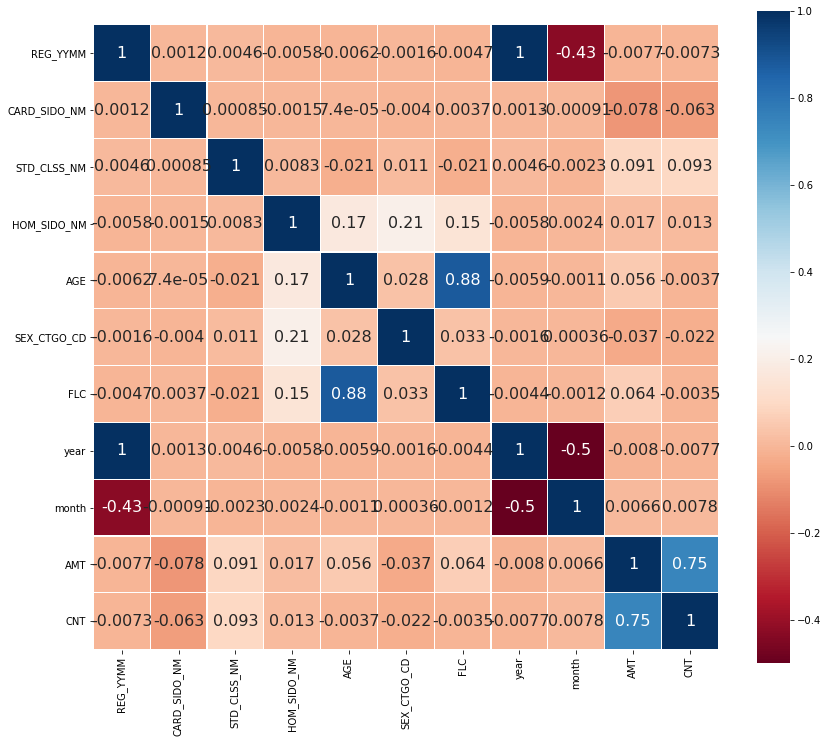

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
sns.heatmap(df_num.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

# 3. 탐색적 자료분석
## Exploratory Data Analysis

In [26]:
# 입력하세요.


# 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling

In [27]:
df_num.shape 
df_num 

(198618, 11)

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT
0,201901,0,0,1,2,1,1,2019,1,311200.0,4
1,201901,0,0,1,3,1,2,2019,1,5169295.0,45
2,201901,0,0,1,3,2,2,2019,1,8618550.0,91
3,201901,0,0,1,4,1,2,2019,1,454420.0,3
4,201901,0,0,1,4,1,3,2019,1,6441165.0,60
...,...,...,...,...,...,...,...,...,...,...,...
198613,202003,16,14,0,0,0,0,2020,3,0.0,0
198614,202003,16,15,0,0,0,0,2020,3,0.0,0
198615,202003,16,23,0,0,0,0,2020,3,0.0,0
198616,202003,16,28,0,0,0,0,2020,3,0.0,0


In [28]:
# 201908 ~ 202002 -> train
# 202003          -> test

train = df_num[df_num['REG_YYMM'] != 202003]
test = df_num[df_num['REG_YYMM'] == 202003]

In [29]:
train.shape
test.shape

(186114, 11)

(12504, 11)

In [30]:
feature = df_num.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
target = np.log1p(df_num['AMT'])

### feature, target 설정

In [31]:
train_feature = train.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
train_target = np.log1p(train['AMT'])

test_feature = test.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
test_target = np.log1p(test['AMT'])

# 5. 모델 학습 및 검증
## Model Tuning & Evaluation

In [32]:
from __future__ import print_function # python 2에서 python 3 문법을 사용하려면

import torch

import torch.nn.init as init # 텐서 초기값 주기 위한 함수 

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim # 경사하강 알고리즘 
from  torch.utils.data import DataLoader, TensorDataset 

import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable

In [33]:
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda.device_count()
torch.cuda.get_device_name(0)
torch.cuda.device(0)

True

0

1

'GeForce MX130'

In [34]:
torch.cuda.empty_cache()
cuda = torch.device('cuda')
cuda

device(type='cuda')

In [35]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [36]:
feature.shape, target.shape

((198618, 8), (198618,))

In [37]:
train_feature.shape, test_feature.shape, train_target.shape, test_target.shape

((186114, 8), (12504, 8), (186114,), (12504,))

In [38]:
train = df_num[df_num['REG_YYMM'] != 202003]
test = df_num[df_num['REG_YYMM'] == 202003]

train_feature = train.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
train_target = np.log1p(train['AMT'])

test_feature = test.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
test_target = np.log1p(test['AMT'])

In [39]:
train_feature = torch.as_tensor(np.array(train_feature).astype('float32'))
train_target = torch.as_tensor(np.array(train_target).astype('float32'))

train = TensorDataset(train_feature, train_target)
train_loader = DataLoader(train, batch_size=100, shuffle=True)
train_loader

In [40]:
# 전체 데이터 
feature = df_num.drop([ 'REG_YYMM','AMT', 'CNT'], axis=1)
target = np.log1p(df_num['AMT'])

train_feature = torch.as_tensor(np.array(feature).astype('float32'))
train_target = torch.as_tensor(np.array(target).astype('float32'))

train = TensorDataset(train_feature, train_target)
train_loader = DataLoader(train, batch_size=100, shuffle=True)
train_loader

In [41]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = F.dropout(x, training=self.training)
        return x

model = Net().cuda()

In [42]:
# 오차함수 객체
criterion = nn.MSELoss()
# 최적화 담당 객체 
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
# 학습 시작
for epoch in range(1000):
    total_loss = 0
    # 분할해 둔 데이터 꺼내옴 
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        
        train_x = train_x.to('cuda')
        train_y = train_y.to('cuda')        
        
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차 계산 
        loss = criterion(output, train_y)
        # 역전파 계산 
        loss.backward()
        # 가중치 업데이트 
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        #print(total_loss, loss.data)
    
    # 50회 반복마다 누적 오차 출력 
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 tensor(292507.5938, device='cuda:0')
200 tensor(291878.5000, device='cuda:0')
300 tensor(291923.5312, device='cuda:0')
400 tensor(292479.5625, device='cuda:0')
500 tensor(293314.8125, device='cuda:0')
600 tensor(292669.0312, device='cuda:0')
700 tensor(293059.4375, device='cuda:0')
800 tensor(291340.0938, device='cuda:0')
900 tensor(293329., device='cuda:0')
1000 tensor(292826.2188, device='cuda:0')


In [51]:
output

tensor([[ 0.0000],
        [16.5972],
        [ 0.0000],
        [16.5972],
        [ 0.0000],
        [16.5972],
        [16.5972],
        [16.5972],
        [ 0.0000],
        [16.5972],
        [16.5972],
        [ 0.0000],
        [ 0.0000],
        [16.5972],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [16.5972]], device='cuda:0', grad_fn=<FusedDropoutBackward>)

# 6. 결과 및 결언
## Conclusion & Discussion

In [44]:
df_num

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT
0,201901,0,0,1,2,1,1,2019,1,311200.0,4
1,201901,0,0,1,3,1,2,2019,1,5169295.0,45
2,201901,0,0,1,3,2,2,2019,1,8618550.0,91
3,201901,0,0,1,4,1,2,2019,1,454420.0,3
4,201901,0,0,1,4,1,3,2019,1,6441165.0,60
...,...,...,...,...,...,...,...,...,...,...,...
198613,202003,16,14,0,0,0,0,2020,3,0.0,0
198614,202003,16,15,0,0,0,0,2020,3,0.0,0
198615,202003,16,23,0,0,0,0,2020,3,0.0,0
198616,202003,16,28,0,0,0,0,2020,3,0.0,0


In [45]:
# 예측 템플릿 만들기
#REG_YYMMs     = [202004, 202007]
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
#STD_CLSS_CDs  = df_num['STD_CLSS_CD'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

In [76]:
temp1 = []

for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp1.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp1 = np.array(temp1)
temp1

array([[   0,    0,    1, ...,    1, 2020,    4],
       [   0,    0,    1, ...,    1, 2020,    7],
       [   0,    0,    1, ...,    2, 2020,    4],
       ...,
       [  16,   30,    0, ...,    5, 2020,    7],
       [  16,   30,    0, ...,    0, 2020,    4],
       [  16,   30,    0, ...,    0, 2020,    7]])

In [77]:
temp = torch.from_numpy(np.array(temp1).astype('float32'))
temp

tensor([[0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 2.0200e+03,
         4.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 2.0200e+03,
         7.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 2.0000e+00, 2.0200e+03,
         4.0000e+00],
        ...,
        [1.6000e+01, 3.0000e+01, 0.0000e+00,  ..., 5.0000e+00, 2.0200e+03,
         7.0000e+00],
        [1.6000e+01, 3.0000e+01, 0.0000e+00,  ..., 0.0000e+00, 2.0200e+03,
         4.0000e+00],
        [1.6000e+01, 3.0000e+01, 0.0000e+00,  ..., 0.0000e+00, 2.0200e+03,
         7.0000e+00]])

In [78]:
#result = torch.max(model(temp).data, 1)[1]
temp = temp.to('cuda')
result = model(temp)
result

RuntimeError: CUDA out of memory. Tried to allocate 196.13 MiB (GPU 0; 2.00 GiB total capacity; 1.37 GiB already allocated; 61.24 MiB free; 484.00 KiB cached)

In [54]:
result.shape
result

torch.Size([401472, 1])

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        ...,
        [ 0.0000],
        [16.6016],
        [ 0.0000]], device='cuda:0', grad_fn=<FusedDropoutBackward>)

In [59]:
result = result.cpu().detach().numpy()

pred = np.expm1(result)
pred
np.round(pred, 0)

array([[       0.],
       [       0.],
       [       0.],
       ...,
       [       0.],
       [16217609.],
       [       0.]], dtype=float32)

array([[       0.],
       [       0.],
       [       0.],
       ...,
       [       0.],
       [16217609.],
       [       0.]], dtype=float32)

In [74]:
np.unique(result)
np.unique(pred)

array([ 0.      , 16.601608], dtype=float32)

array([       0., 16217609.], dtype=float32)

In [62]:
temp1['AMT'] = np.round(pred, 0)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
pred.shape
pred

In [ ]:
temp['AMT'] = np.round(pred, 0)
#temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
temp

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('20200726_1.csv', encoding='utf-8-sig')
submission.head(30)